# Question 1
## Import libraries

In [160]:
import numpy as np
import pandas as pd

## Download data from Wiki

In [161]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
table = pd.read_html(url)
type(table)

list

## Get the neighbourhood info from downloaded info

In [162]:
neigh_df = table[0].copy()
print(neigh_df.shape)
neigh_df.head()

(288, 3)


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


## Drop rows with a borough that is Not assigned

In [163]:
neigh_df.drop(neigh_df.loc[neigh_df["Borough"] == "Not assigned"].index, axis = 0, inplace = True)
print(neigh_df.shape)
neigh_df.head()

(211, 3)


,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


## Rename Column name to PostalCode

In [164]:
neigh_df.reset_index(drop = True, inplace = True)
neigh_df.rename(columns = {'Postcode' : 'PostalCode'}, inplace = True)
neigh_df.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


## Merge Neighbourhood records for those with same PostalCode

In [165]:
# Define function to get a string of Neighbourhoods from the same postal code group, input is groupby object
def getNeighbors(group):
    a = ''
    for data in group['Neighbourhood']:
        if a == '':
            a = data
        else:
            a = a + ', '+ data
    return a

In [166]:
# an empty list to contain new data
neigh_data = []
# group data based on 'PostalCode'
grouping = neigh_df.groupby('PostalCode')
# check each sub group to get data to construct new dataframe
for postcode in neigh_df['PostalCode'].unique():
    sub_group = grouping.get_group(postcode)
    PostalCode = sub_group.PostalCode.values[0]
    Borough = sub_group.Borough.values[0]
    Neighbourhood = getNeighbors(sub_group)
    # append data to the data list
    neigh_data.append([PostalCode,Borough,Neighbourhood])
# create new data frame
neigh_df_new = pd.DataFrame(neigh_data,columns = ['PostalCode','Borough','Neighbourhood'])
neigh_df_new.shape

(103, 3)

In [167]:
neigh_df_new.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Not assigned


## Clean Neighbourhood data with 'Not assigned' value

In [168]:
# See the records with 'Not assigned' value as Neighbourhood
neigh_df_new.loc[neigh_df_new['Neighbourhood']=='Not assigned']

,PostalCode,Borough,Neighbourhood
4,M7A,Queen's Park,Not assigned


In [169]:
# Update the 'Not assigned' value to be the same as Borough value
for x, y in neigh_df_new.iterrows():
    if neigh_df_new.at[x,'Neighbourhood'] == 'Not assigned':
        neigh_df_new.at[x,'Neighbourhood'] = neigh_df_new.at[x,'Borough']

In [170]:
# Check the records after fix
neigh_df_new.loc[neigh_df_new['Neighbourhood']=='Not assigned']

,PostalCode,Borough,Neighbourhood


In [171]:
neigh_df_new.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


## Number of rows of my dataframe

In [172]:
print(neigh_df_new.shape)
print("Number of rows: ",neigh_df_new.shape[0])

(103, 3)
Number of rows:  103


# Question 2
## Create coordinates df of the neighbourbood

In [173]:
co_df = pd.read_csv('http://cocl.us/Geospatial_data')

In [174]:
co_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [175]:
neigh_df_new.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [176]:
neigh_co_df = neigh_df_new.merge(co_df, left_on = 'PostalCode', right_on = 'Postal Code', how = 'inner')
neigh_co_df.head()

,PostalCode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",M5A,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",M6A,43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,M7A,43.662301,-79.389494


In [177]:
neigh_co_df.drop('Postal Code', axis = 1, inplace = True)
neigh_co_df.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


# Question 3

### Get coordinates of Toronto City

In [178]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Toronto City'
geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.7189883, -79.44157.


### work with only boroughs that contain the word Toronto 

In [232]:
toronto_neigh = neigh_co_df.loc[neigh_co_df['Borough'].str.contains('Toronto', case = False, regex = False)  ]
toronto_neigh.reset_index(inplace = True)
toronto_neigh.drop('index', axis = 1, inplace = True)
toronto_neigh.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(38, 5)

### Create map

In [181]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

In [182]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_neigh['Latitude'], toronto_neigh['Longitude'], toronto_neigh['Borough'], toronto_neigh['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

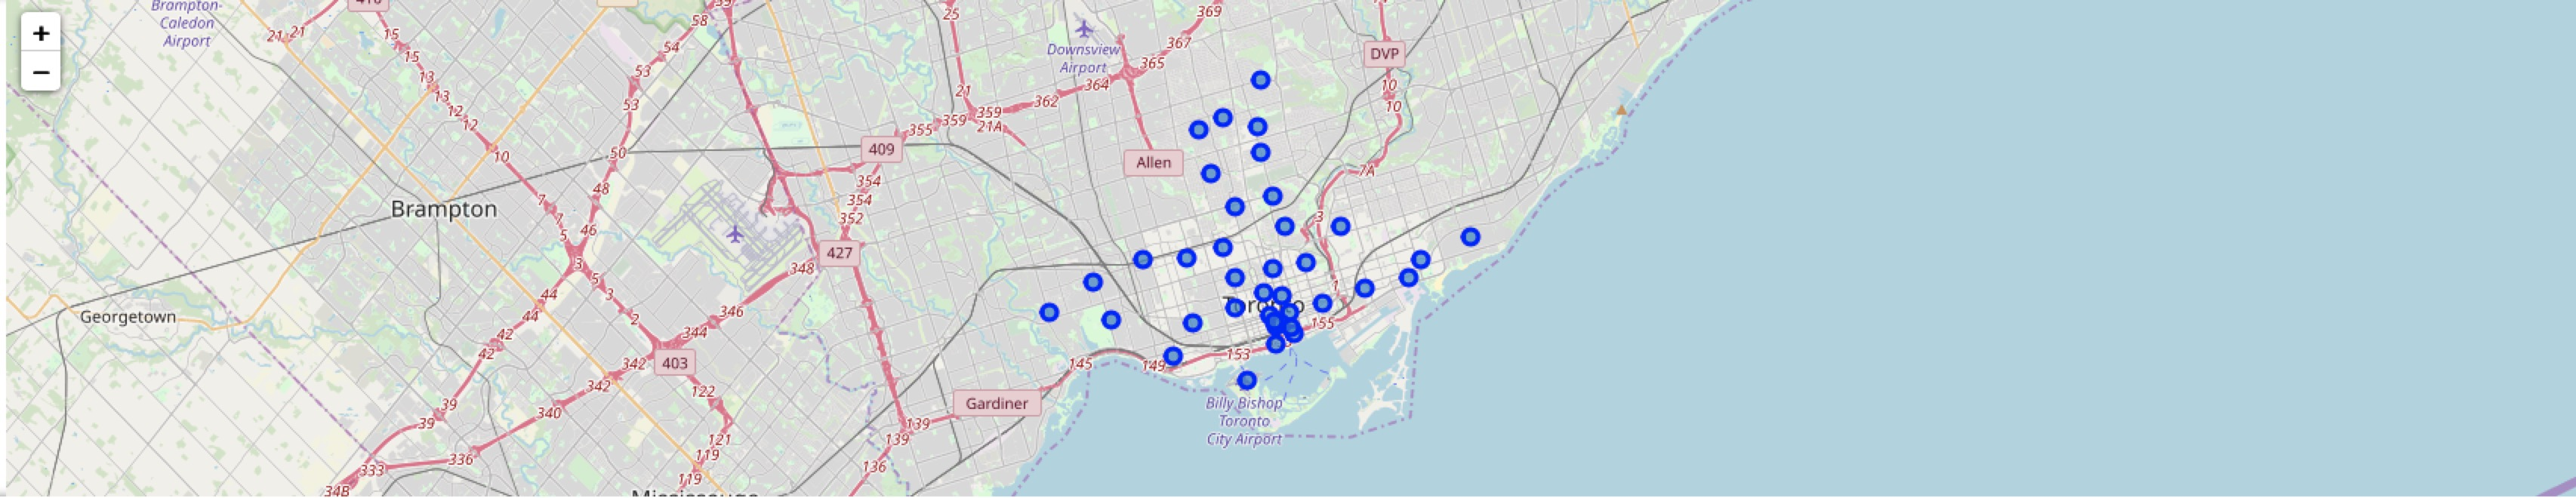

### Define Foursquare Credentials and Version

In [183]:
CLIENT_ID = '5PQ01HXUMWMKME2WGEXDQYZKXQFZ3TOC3JKSEQXU3MCPFZIJ' # your Foursquare ID
CLIENT_SECRET = '2ZENL5TVYHGWROGEZNTMAQB1RLYSFRPT3QH5FT3MRA34E0OU' # your Foursquare Secret
VERSION = '20190818'
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 5PQ01HXUMWMKME2WGEXDQYZKXQFZ3TOC3JKSEQXU3MCPFZIJ
CLIENT_SECRET:2ZENL5TVYHGWROGEZNTMAQB1RLYSFRPT3QH5FT3MRA34E0OU


### Explore the first neighborhood

In [184]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
toronto_neigh.shape

(38, 5)

In [185]:
toronto_neigh.loc[0, 'Neighbourhood']

'Harbourfront, Regent Park'

In [186]:
neighborhood_latitude = toronto_neigh.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_neigh.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_neigh.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Harbourfront, Regent Park are 43.6542599, -79.3606359.


###  Get the top 100 venues that are in Harbourfront, Regent Park within a radius of 500 meters

In [187]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
#results

In [188]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [189]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Toronto Cooper Koo Family Cherry St YMCA Centre,Gym / Fitness Center,43.653191,-79.357947
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149


In [190]:
nearby_venues.shape

(49, 4)

## Explore Neighborhoods in Toronto

#### Create a function to repeat the same process to all the neighborhoods in Toronto

In [191]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Get all venues for all neighbourhoods and put in new data frame

In [192]:
toronto_venues = getNearbyVenues(names=toronto_neigh['Neighbourhood'],
                                   latitudes=toronto_neigh['Latitude'],
                                   longitudes=toronto_neigh['Longitude']
                                  )

Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
The Beaches West, India Bazaar
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North, Forest Hill West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Runnymede, Swansea
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
Fir

In [193]:
toronto_venues.shape

(1699, 7)

In [194]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront, Regent Park",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Harbourfront, Regent Park",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Harbourfront, Regent Park",43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,Gym / Fitness Center
3,"Harbourfront, Regent Park",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Harbourfront, Regent Park",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


### how many unique categories

In [195]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 238 uniques categories.


## Analyze Each Neighborhood

In [253]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
print(toronto_onehot.shape)
# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighborhood'] 
# move neighborhood column to the first column
toronto_onehot.columns[-1]
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

(1699, 238)


,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group the data by Neighbourhood and store the means of the occurance

In [256]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.03,0.0,...,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.01,0.01,0.0
1,Berczy Park,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,...,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.00,0.00,0.0
2,"Brockton, Exhibition Place, Parkdale Village",0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.0,0.0625,0.0625,0.0625,0.125,0.125,0.125,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0


### Create the new dataframe and display the top 10 venues for each neighborhood.

In [199]:
#function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [295]:
# create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)

neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']
print(toronto_grouped.shape)


for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()
#neighborhoods_venues_sorted.shape

(37, 239)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,Gym,Breakfast Spot,Hotel,Asian Restaurant,American Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Steakhouse,Seafood Restaurant,Café,Cheese Shop,Beer Bar,Eastern European Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Breakfast Spot,Café,Burrito Place,Stadium,Climbing Gym,Bar,Bakery,Furniture / Home Store,Italian Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Pizza Place,Garden,Comic Shop,Restaurant,Burrito Place,Skate Park,Smoke Shop,Brewery,Farmers Market,Fast Food Restaurant
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Plane,Harbor / Marina,Coffee Shop,Boat or Ferry,Boutique,Sculpture Garden,Airport Gate


##  Cluster Neighborhoods

In [296]:
# Run k-means to cluster the neighborhood into 5 clusters.
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [202]:
toronto_neigh.head(2)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [203]:
neighborhoods_venues_sorted.head(2)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,Gym,Breakfast Spot,Hotel,Asian Restaurant,American Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Steakhouse,Seafood Restaurant,Café,Cheese Shop,Beer Bar,Eastern European Restaurant


###  Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [297]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_neigh

# merge toronto_grouped with toronto_neigh to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head()# check the last columns!.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,3,Coffee Shop,Bakery,Café,Park,Breakfast Spot,Theater,Pub,Mexican Restaurant,Restaurant,Chocolate Shop
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,3,Coffee Shop,Clothing Store,Cosmetics Shop,Café,Middle Eastern Restaurant,Plaza,Diner,Fast Food Restaurant,Pizza Place,Italian Restaurant
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3,Café,Restaurant,Hotel,Coffee Shop,Italian Restaurant,Beer Bar,Breakfast Spot,Bakery,Cocktail Bar,Gastropub
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Health Food Store,Pub,Trail,Neighborhood,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Discount Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,3,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Steakhouse,Seafood Restaurant,Café,Cheese Shop,Beer Bar,Eastern European Restaurant


###  visualize the resulting clusters

In [298]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

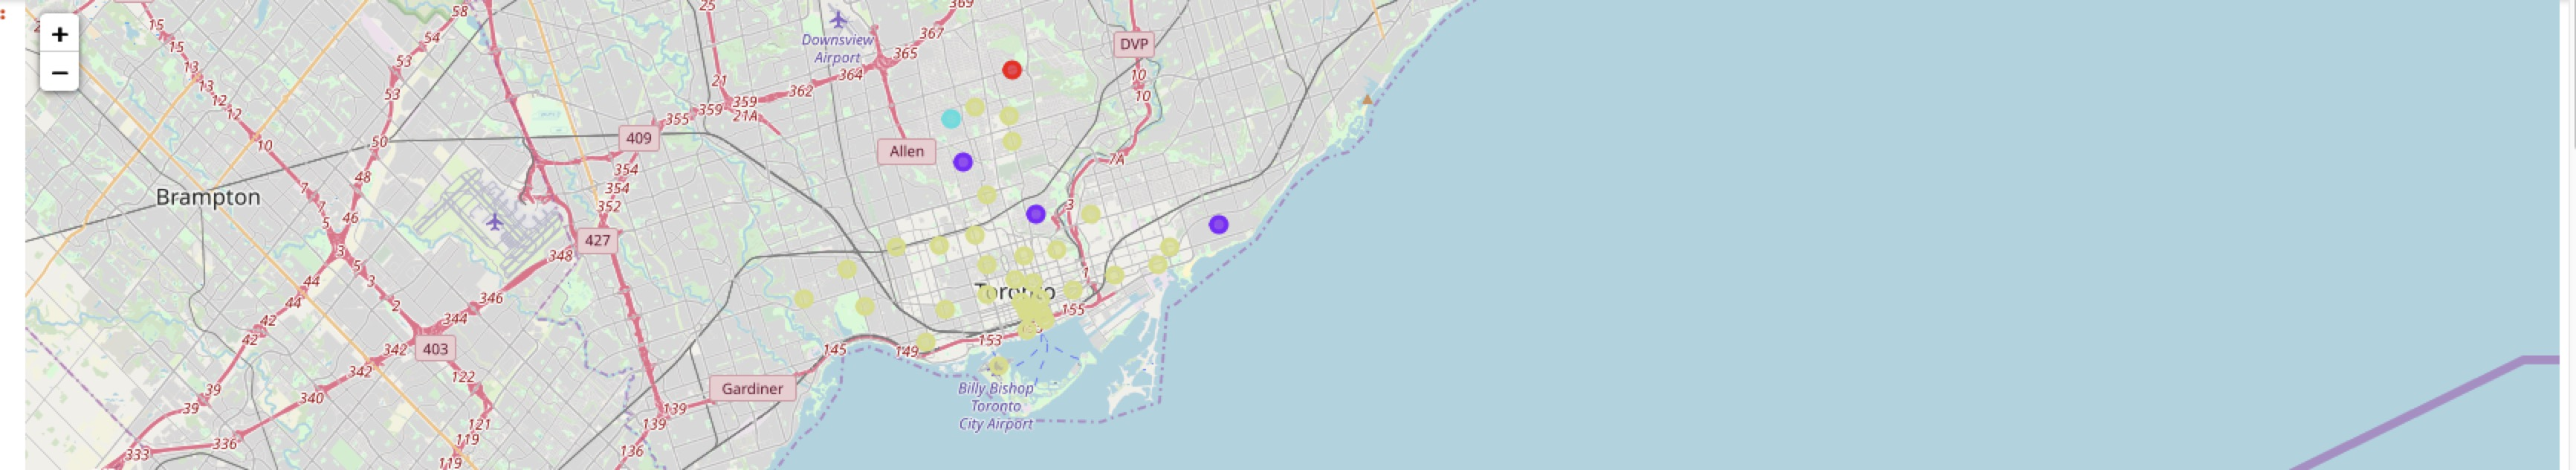

## Examine Clusters

#### Cluster 0 has only one neighborhood, it is really close to a park and abit far from the city center

In [299]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Central Toronto,0,Park,Bus Line,Swim School,Yoga Studio,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


#### Cluster 1 covers the neighbourhoods that are more close to Traffic and health care infrustructures like playground, health food shops

In [300]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,East Toronto,1,Health Food Store,Pub,Trail,Neighborhood,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Discount Store
20,Central Toronto,1,Trail,Bus Line,Sushi Restaurant,Jewelry Store,Yoga Studio,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
32,Downtown Toronto,1,Park,Trail,Playground,Building,Ethiopian Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store


#### Cluster 2 contains only one neighborhood and it is kind of mixed of all features

In [301]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,2,Garden,Yoga Studio,Flea Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


#### Cluster 3 refers to the neighborhoods which are more like business districts where cafe,  restaurants, shopping centers are located.

In [302]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,3,Coffee Shop,Bakery,Café,Park,Breakfast Spot,Theater,Pub,Mexican Restaurant,Restaurant,Chocolate Shop
1,Downtown Toronto,3,Coffee Shop,Clothing Store,Cosmetics Shop,Café,Middle Eastern Restaurant,Plaza,Diner,Fast Food Restaurant,Pizza Place,Italian Restaurant
2,Downtown Toronto,3,Café,Restaurant,Hotel,Coffee Shop,Italian Restaurant,Beer Bar,Breakfast Spot,Bakery,Cocktail Bar,Gastropub
4,Downtown Toronto,3,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Steakhouse,Seafood Restaurant,Café,Cheese Shop,Beer Bar,Eastern European Restaurant
5,Downtown Toronto,3,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Sandwich Place,Burger Joint,Chinese Restaurant,Salad Place,Spa,Bar
6,Downtown Toronto,3,Café,Grocery Store,Park,Coffee Shop,Baby Store,Italian Restaurant,Athletics & Sports,Diner,Nightclub,Restaurant
7,Downtown Toronto,3,Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,Gym,Breakfast Spot,Hotel,Asian Restaurant,American Restaurant
8,West Toronto,3,Bakery,Supermarket,Pharmacy,Furniture / Home Store,Brewery,Bar,Music Venue,Middle Eastern Restaurant,Café,Park
9,Downtown Toronto,3,Coffee Shop,Aquarium,Hotel,Café,Italian Restaurant,Sporting Goods Shop,Pizza Place,Bakery,Scenic Lookout,Brewery
10,West Toronto,3,Bar,Coffee Shop,Asian Restaurant,Bakery,Wine Bar,Vietnamese Restaurant,Café,French Restaurant,Restaurant,Boutique
